In [1]:
import numpy as np
import matplotlib.pyplot as plt
import iDEA
import ipywidgets as widgets
from IPython.display import display
import pickle
import time
from pathlib import Path
import collections_iDEA
import collections_iDEA.multiplets as mm
import os
import scipy.special as sp

# Initialize the system
points = 231
l = 10
x = np.linspace(-l, l, points)
dx = x[1] - x[0]
omega = 0.3275
v_ext = 0.5 * omega**2 * (x**2)
v_int = np.zeros([len(x), len(x)])
qho_single = iDEA.system.System(x, v_ext, v_int, electrons="u")
qho_double = iDEA.system.System(x, v_ext, v_int, electrons="uu")

states_small_int = {}
states_zero_int = {}
occupied_info = []

# int = 1e-11


In [2]:
directory = Path("states")

# for i in range(0, 5):
#     file_path = directory / f"qho_small_int_state_{i}_1e-11.pkl"
#     try:
#         with file_path.open("rb") as file:
#             states_small_int[i] = pickle.load(file)
#     except FileNotFoundError:
#         print(f"File state_{i}.pkl not found.")
#     except Exception as e:
#         print(f"An error occurred while loading state_{i}.pkl: {e}")

max_k = 8

iDEA_collection = collections_iDEA.CollectionOfStates(max_k)
energy_array = np.zeros(max_k)

for i in range(max_k):
    file_path = directory / f"qho_double_state_{i}_231_points.pkl"
    try:
        with file_path.open("rb") as file:
            state = pickle.load(file)
            iDEA_collection.add_state_class(state)
            energy_array[i] = state.energy
    except FileNotFoundError:
        print(f"File state_{i}.pkl not found.")
    except Exception as e:
        print(f"An error occurred while loading state_{i}.pkl: {e}")

iDEA_collection.add_energies(energy_array)




def qho_energy(index):
    return omega*(index + 0.5)
index_list = collections_iDEA.CollectionOfStates(7)
mm.apply_energy_method(qho_energy, qho_double, 7, states=index_list, second_mask=False)
index_list.calculate_multiplets()

for i in range(len(index_list.up_indices)):

    print(f"Analytic State {i}, First Index: {index_list.up_indices[i]}, Second Index: {index_list.down_indices[i]}, Energy: {index_list.energies[i]}")

print(f"Multiplets: {index_list.multiplets}")

iDEA_collection.calculate_multiplets()
print(f"Multiplets: {iDEA_collection.multiplets}")
print(index_list.check_expected_num_of_multiplets(iDEA_collection.multiplets, iDEA_collection.multiplet_energies))

File indices_up_to_20.pkl exists
Elapsed Time = 0.003868181003781501
Analytic State 0, First Index: 0, Second Index: 1, Energy: 0.655
Analytic State 1, First Index: 1, Second Index: 0, Energy: 0.655
Analytic State 2, First Index: 0, Second Index: 2, Energy: 0.9825000000000002
Analytic State 3, First Index: 2, Second Index: 0, Energy: 0.9825000000000002
Analytic State 4, First Index: 0, Second Index: 3, Energy: 1.31
Analytic State 5, First Index: 1, Second Index: 2, Energy: 1.31
Analytic State 6, First Index: 2, Second Index: 1, Energy: 1.31
Multiplets: [[0, 1], [2, 3]]
Multiplets: [[4, 5]]
{1: ('Got: [4, 5] with energy: 1.310000000307644', 'Expected: [0, 1]', 'Expected energy: 0.655')}


In [3]:
# for key, value in states_small_int.items():
#     print(f"iDEA State {key}, Energy = {value.energy}")

for i in range(len(iDEA_collection.state_classes)):
    print(f"iDEA State {i}, Energy = {iDEA_collection.energies[i]}")

iDEA State 0, Energy = 0.6550000000054609
iDEA State 1, Energy = 0.9825000000192029
iDEA State 2, Energy = 1.3100000000181249
iDEA State 3, Energy = 1.310000000020134
iDEA State 4, Energy = 1.3100000003068801
iDEA State 5, Energy = 1.310000000307644
iDEA State 6, Energy = 1.6375000000336406
iDEA State 7, Energy = 1.6375000003072353


In [4]:
analytic_prob_densities = []

def wave_function(index, omega, x):
    exponent = -(omega * (x**2)) / (2)
    t = np.sqrt(1 / ((2**index) * sp.factorial(index))) * pow((omega/np.pi), 0.25) * np.exp(exponent) * sp.eval_hermite(index, np.sqrt(omega)*x)

    return t

# ind = [[0, 1], [0, 2], [1, 2], [2, 1], [0, 3]]

for i in range(7):
    index_k = index_list.up_indices[i]
    index_j = index_list.down_indices[i]
    # index_k = ind[i][0]
    # index_j = ind[i][1]
    print(f"State {i}, {index_k} | {index_j}")

    pd_analytic_1 = (np.abs(wave_function(index_k, omega, x)))**2 + (np.abs(wave_function(index_j, omega, x)))**2
    analytic_prob_densities.append(pd_analytic_1)

State 0, 0 | 1
State 1, 1 | 0
State 2, 0 | 2
State 3, 2 | 0
State 4, 0 | 3
State 5, 1 | 2
State 6, 2 | 1


In [5]:
collections_iDEA.analysis.states_density_comparison(iDEA_collection, qho_double, analytic_prob_densities)

interactive(children=(IntSlider(value=0, description='k:', max=7), Output()), _dom_classes=('widget-interact',…

In [6]:
analytic_prob_densities = []

def wave_function(index, omega, x):
    exponent = -(omega * (x**2)) / (2)
    t = np.sqrt(1 / ((2**index) * sp.factorial(index))) * pow((omega/np.pi), 0.25) * np.exp(exponent) * sp.eval_hermite(index, np.sqrt(omega)*x)

    return t

ind = [[0, 1], [0, 2], [1, 2], [2, 1], [0, 3], [3, 0], [1, 3]]

for i in range(7):
    # index_k = index_list.up_indices[i]
    # index_j = index_list.down_indices[i]
    index_k = ind[i][0]
    index_j = ind[i][1]
    print(f"State {i}, {index_k} | {index_j}")

    pd_analytic_1 = (np.abs(wave_function(index_k, omega, x)))**2 + (np.abs(wave_function(index_j, omega, x)))**2
    analytic_prob_densities.append(pd_analytic_1)

State 0, 0 | 1
State 1, 0 | 2
State 2, 1 | 2
State 3, 2 | 1
State 4, 0 | 3
State 5, 3 | 0
State 6, 1 | 3


In [7]:
collections_iDEA.analysis.states_density_comparison(iDEA_collection, qho_double, analytic_prob_densities)

interactive(children=(IntSlider(value=0, description='k:', max=7), Output()), _dom_classes=('widget-interact',…

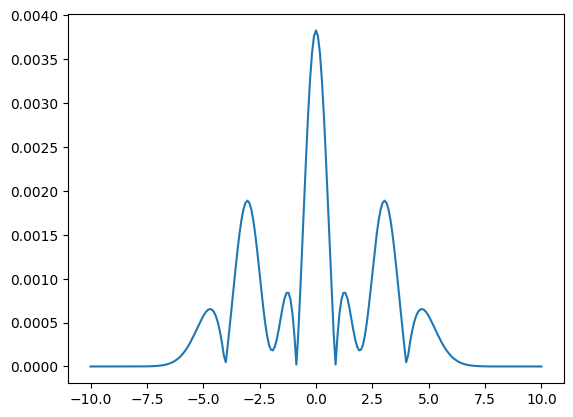

In [8]:
diff = []
n = iDEA.observables.density(qho_double, iDEA_collection.state_classes[6])        


for i in range(len(n)):
        diff.append(abs(n[i] - analytic_prob_densities[6][i]))



plt.plot(x, diff)

# int = 0

In [9]:
max_k = 7

iDEA_collection = collections_iDEA.CollectionOfStates(max_k)
energy_array = np.zeros(max_k)

for i in range(max_k):
    file_path = directory / f"qho__zero_double_state_{i}_231_points.pkl"
    try:
        with file_path.open("rb") as file:
            state = pickle.load(file)
            iDEA_collection.add_state_class(state)
            energy_array[i] = state.energy
    except FileNotFoundError:
        print(f"File state_{i}.pkl not found.")
    except Exception as e:
        print(f"An error occurred while loading state_{i}.pkl: {e}")

iDEA_collection.add_energies(energy_array)

In [10]:
def qho_energy(index):
    return omega*(index + 0.5)

index_list = mm.apply_energy_method(qho_energy, qho_double, 9, second_mask=False)
index_list.calculate_multiplets()

for i in range(len(index_list.up_indices)):

    print(f"Analytic State {i}, First Index: {index_list.up_indices[i]}, Second Index: {index_list.down_indices[i]}, Energy: {index_list.energies[i]}")

print(f"Multiplets: {index_list.multiplets}")

File indices_up_to_20.pkl exists
Elapsed Time = 0.002457047005009372
Analytic State 0, First Index: 0, Second Index: 1, Energy: 0.655
Analytic State 1, First Index: 1, Second Index: 0, Energy: 0.655
Analytic State 2, First Index: 0, Second Index: 2, Energy: 0.9825000000000002
Analytic State 3, First Index: 2, Second Index: 0, Energy: 0.9825000000000002
Analytic State 4, First Index: 0, Second Index: 3, Energy: 1.31
Analytic State 5, First Index: 1, Second Index: 2, Energy: 1.31
Analytic State 6, First Index: 2, Second Index: 1, Energy: 1.31
Analytic State 7, First Index: 3, Second Index: 0, Energy: 1.31
Analytic State 8, First Index: 1, Second Index: 3, Energy: 1.6375
Multiplets: [[0, 1], [2, 3], [4, 5, 6, 7]]


In [11]:
for i in range(len(iDEA_collection.state_classes)):
    print(f"iDEA State {i}, Energy = {iDEA_collection.energies[i]}")

iDEA State 0, Energy = 0.6550000000004116
iDEA State 1, Energy = 0.9825000000151435
iDEA State 2, Energy = 1.3100000000154601
iDEA State 3, Energy = 1.3100000000155718
iDEA State 4, Energy = 1.3100000003039753
iDEA State 5, Energy = 1.3100000003041676
iDEA State 6, Energy = 1.6375000000300044


In [12]:
analytic_prob_densities = []

def wave_function(index, omega, x):
    exponent = -(omega * (x**2)) / (2)
    t = np.sqrt(1 / ((2**index) * sp.factorial(index))) * pow((omega/np.pi), 0.25) * np.exp(exponent) * sp.eval_hermite(index, np.sqrt(omega)*x)

    return t

# ind = [[0, 1], [0, 2], [1, 2], [2, 1], [0, 3]]

for i in range(7):
    index_k = index_list.up_indices[i]
    index_j = index_list.down_indices[i]
    # index_k = ind[i][0]
    # index_j = ind[i][1]
    print(f"State {i}, {index_k} | {index_j}")

    pd_analytic_1 = (np.abs(wave_function(index_k, omega, x)))**2 + (np.abs(wave_function(index_j, omega, x)))**2
    analytic_prob_densities.append(pd_analytic_1)

State 0, 0 | 1
State 1, 1 | 0
State 2, 0 | 2
State 3, 2 | 0
State 4, 0 | 3
State 5, 1 | 2
State 6, 2 | 1


In [13]:
collections_iDEA.analysis.states_density_comparison(iDEA_collection, qho_double, analytic_prob_densities)

interactive(children=(IntSlider(value=0, description='k:', max=6), Output()), _dom_classes=('widget-interact',…

In [14]:
analytic_prob_densities = []

def wave_function(index, omega, x):
    exponent = -(omega * (x**2)) / (2)
    t = np.sqrt(1 / ((2**index) * sp.factorial(index))) * pow((omega/np.pi), 0.25) * np.exp(exponent) * sp.eval_hermite(index, np.sqrt(omega)*x)

    return t

ind = [[0, 1], [0, 2], [1, 2], [2, 1], [0, 3], [3, 0], [1, 3]]

for i in range(7):
    # index_k = index_list.up_indices[i]
    # index_j = index_list.down_indices[i]
    index_k = ind[i][0]
    index_j = ind[i][1]
    print(f"State {i}, {index_k} | {index_j}")

    pd_analytic_1 = (np.abs(wave_function(index_k, omega, x)))**2 + (np.abs(wave_function(index_j, omega, x)))**2
    analytic_prob_densities.append(pd_analytic_1)

State 0, 0 | 1
State 1, 0 | 2
State 2, 1 | 2
State 3, 2 | 1
State 4, 0 | 3
State 5, 3 | 0
State 6, 1 | 3


In [15]:
collections_iDEA.analysis.states_density_comparison(iDEA_collection, qho_double, analytic_prob_densities)

interactive(children=(IntSlider(value=0, description='k:', max=6), Output()), _dom_classes=('widget-interact',…

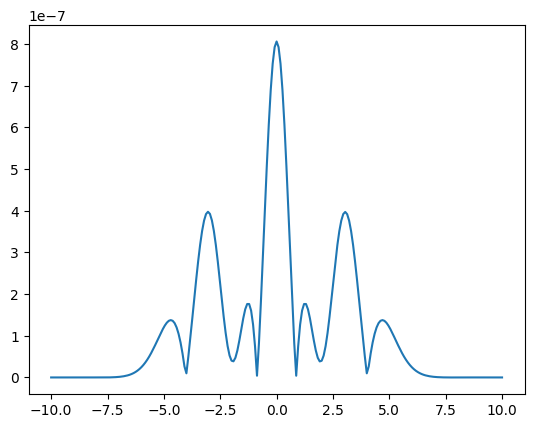

In [16]:
diff = []
n = iDEA.observables.density(qho_double, iDEA_collection.state_classes[6])        


for i in range(len(n)):
        diff.append(abs(n[i] - analytic_prob_densities[6][i]))



plt.plot(x, diff)

# int = 0, 300 points


In [17]:
points = 300
l = 10
x = np.linspace(-l, l, points)
dx = x[1] - x[0]
omega = 0.3275
v_ext = 0.5 * omega**2 * (x**2)
v_int = np.zeros([len(x), len(x)])
qho_single = iDEA.system.System(x, v_ext, v_int, electrons="u")
qho_double = iDEA.system.System(x, v_ext, v_int, electrons="uu")


max_k = 6

iDEA_collection = collections_iDEA.CollectionOfStates(max_k)
energy_array = np.zeros(max_k)

for i in range(max_k):
    file_path = directory / f"qho__zero_double_state_{i}_300_points.pkl"
    try:
        with file_path.open("rb") as file:
            state = pickle.load(file)
            iDEA_collection.add_state_class(state)
            energy_array[i] = state.energy
    except FileNotFoundError:
        print(f"File state_{i}.pkl not found.")
    except Exception as e:
        print(f"An error occurred while loading state_{i}.pkl: {e}")

iDEA_collection.add_energies(energy_array)

In [18]:
def qho_energy(index):
    return omega*(index + 0.5)

index_list = mm.apply_energy_method(qho_energy, qho_double, 9, second_mask=False)
index_list.calculate_multiplets()

for i in range(len(index_list.up_indices)):

    print(f"Analytic State {i}, First Index: {index_list.up_indices[i]}, Second Index: {index_list.down_indices[i]}, Energy: {index_list.energies[i]}")

print(f"Multiplets: {index_list.multiplets}")

File indices_up_to_20.pkl exists
Elapsed Time = 0.0056731580043560825
Analytic State 0, First Index: 0, Second Index: 1, Energy: 0.655
Analytic State 1, First Index: 1, Second Index: 0, Energy: 0.655
Analytic State 2, First Index: 0, Second Index: 2, Energy: 0.9825000000000002
Analytic State 3, First Index: 2, Second Index: 0, Energy: 0.9825000000000002
Analytic State 4, First Index: 0, Second Index: 3, Energy: 1.31
Analytic State 5, First Index: 1, Second Index: 2, Energy: 1.31
Analytic State 6, First Index: 2, Second Index: 1, Energy: 1.31
Analytic State 7, First Index: 3, Second Index: 0, Energy: 1.31
Analytic State 8, First Index: 1, Second Index: 3, Energy: 1.6375
Multiplets: [[0, 1], [2, 3], [4, 5, 6, 7]]


In [19]:
for i in range(len(iDEA_collection.state_classes)):
    print(f"iDEA State {i}, Energy = {iDEA_collection.energies[i]}")

iDEA State 0, Energy = 0.6550000000004805
iDEA State 1, Energy = 0.9825000000169212
iDEA State 2, Energy = 1.3100000000171492
iDEA State 3, Energy = 1.3100000000172471
iDEA State 4, Energy = 1.3100000003375443
iDEA State 5, Energy = 1.3100000003375165


In [20]:
analytic_prob_densities = []

def wave_function(index, omega, x):
    exponent = -(omega * (x**2)) / (2)
    t = np.sqrt(1 / ((2**index) * sp.factorial(index))) * pow((omega/np.pi), 0.25) * np.exp(exponent) * sp.eval_hermite(index, np.sqrt(omega)*x)

    return t


# ind = [[0, 1], [0, 2], [1, 2], [2, 1], [0, 3]]

for i in range(7):
    index_k = index_list.up_indices[i]
    index_j = index_list.down_indices[i]
    # index_k = ind[i][0]
    # index_j = ind[i][1]
    print(f"State {i}, {index_k} | {index_j}")

    pd_analytic_1 = (np.abs(collections_iDEA.wavefunctions.qho_wave_function(index_k, omega, x)))**2 + (np.abs(collections_iDEA.wavefunctions.qho_wave_function(index_j, omega, x)))**2
    analytic_prob_densities.append(pd_analytic_1)

State 0, 0 | 1
State 1, 1 | 0
State 2, 0 | 2
State 3, 2 | 0
State 4, 0 | 3
State 5, 1 | 2
State 6, 2 | 1


In [21]:
collections_iDEA.analysis.states_density_comparison(iDEA_collection, qho_double, analytic_prob_densities)

interactive(children=(IntSlider(value=0, description='k:', max=5), Output()), _dom_classes=('widget-interact',…